In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential

from numpy import savetxt

from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import chi2
import tensorflow as tf
from tensorflow.keras import regularizers

In [2]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from numpy import savetxt
from scipy.io.arff import loadarff 
from sklearn import preprocessing
import torch
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import chi2, RFE

# models
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier
#import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, balanced_accuracy_score, average_precision_score, \
    mean_squared_error, r2_score, brier_score_loss
from sklearn.utils import resample
from scipy.stats import pearsonr
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import json
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers

import random
import string
import datetime

from typing import Tuple

import logging
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras import optimizers

from tensorflow import keras

In [4]:
df_cm1 = pd.read_csv("./data/cm1/cm1-CTGAN.csv")
df_cm1.head()
df=df_cm1
df.head()

,Unnamed: 0,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,IOCode,IOComment,IOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,56.0,18.2,1.1,1.5,282.6,887.70,0.10,7.49,114.25,...,1,5,10,0,11.7,14.8,17.4,12.4,23.4,False
1,1,39.7,1.6,7.6,1.0,252.4,622.68,0.36,12.69,14.26,...,2,1,6,0,2.7,1.7,123.3,0.0,73.2,False
2,2,53.3,7.2,9.9,1.0,56.9,471.91,0.14,7.65,57.50,...,8,6,4,0,13.8,159.8,43.6,15.5,7.0,False
3,3,56.5,6.2,1.0,1.0,146.6,2837.89,0.08,41.47,11.39,...,3,8,9,0,1.1,14.7,21.4,36.9,6.4,False
4,4,35.3,3.3,11.6,1.0,316.9,2606.45,0.08,12.52,42.34,...,3,2,1,0,1.0,10.8,17.3,51.8,13.0,False


In [5]:
df.shape
X = df.iloc[:, :-1]
X.head()
X.shape


(1000, 22)

In [6]:
y = df.iloc[:, -1]
y.shape

(1000,)

In [7]:
y.value_counts()

False    916
True      84
Name: defects, dtype: int64

Optimal number of features : 21


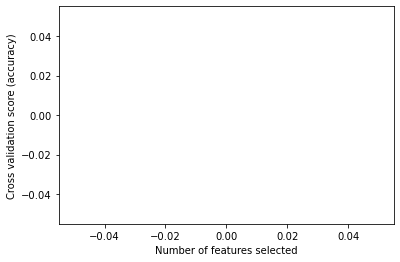

In [8]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
svc = SVC(kernel="linear")
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=0),
    step=1,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    #range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
   # rfecv.grid_scores_,
)
plt.show()

In [101]:
rfecv.n_features_ = 16

In [102]:
selector = RFE(estimator = RandomForestClassifier(random_state=0), n_features_to_select=rfecv.n_features_, step=1)
selector = selector.fit(X, y)
selector.ranking_, selector.support_

(array([1, 1, 2, 1, 1, 1, 5, 1, 1, 1, 4, 1, 1, 3, 1, 6, 1, 1, 1, 1, 1]),
 array([ True,  True, False,  True,  True,  True, False,  True,  True,
         True, False,  True,  True, False,  True, False,  True,  True,
         True,  True,  True]))

In [103]:
[i for i, x in enumerate(selector.support_) if not x]

[2, 6, 10, 13, 15]

In [104]:
X = X.drop(X.columns[[i for i, x in enumerate(selector.support_) if not x]], axis=1)

In [105]:
scaler = StandardScaler()

In [106]:
X = np.asarray(X)

In [107]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-5.34169746e-01, -3.79971989e-01, -2.85297268e-01, ...,
        -4.41634013e-01, -4.50326207e-01, -4.37779376e-01],
       [-5.35475142e-01, -4.10690827e-01, -3.29165274e-01, ...,
        -4.42954086e-01, -4.52319286e-01, -4.55481171e-01],
       [ 3.91355850e-01,  5.00917534e-02,  2.19184797e-01, ...,
         2.89685946e-01,  3.94739443e-01,  7.55726713e-02],
       ...,
       [-2.62878871e-04, -1.80299537e-01, -2.19495260e-01, ...,
        -6.01331681e-02, -2.38072231e-02, -1.89954250e-01],
       [-4.17989523e-01, -4.10690827e-01, -3.29165274e-01, ...,
        -3.10946873e-01, -3.12803731e-01, -4.55481171e-01],
       [-3.00503904e-01, -2.57096634e-01, -3.29165274e-01, ...,
        -2.44943266e-01, -1.93218969e-01, -2.78463223e-01]])

In [108]:
X.shape

(10880, 16)

SMOTE

Counter({0: 8777, 1: 2103})


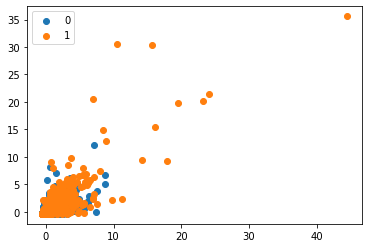

In [109]:
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({0: 8777, 1: 8777})


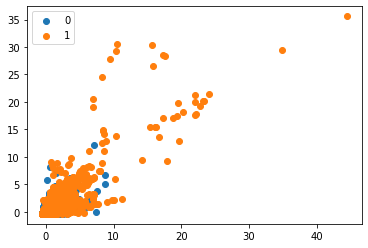

In [110]:
over = SMOTE(random_state=42)
# transform the dataset
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

ADASYS

Counter({1: 8877, 0: 8777})


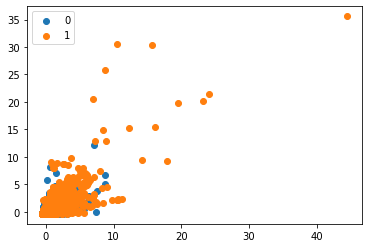

In [87]:
from imblearn.over_sampling import ADASYN 
over = ADASYN()
# transform the dataset
X, y = over.fit_resample(X, y)
counter = Counter(y)
print(counter)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [111]:
X.shape, y.shape

((17554, 16), (17554,))

In [112]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

acc_train_his = []
acc_val_his = []

loss_train_his = []
loss_val_his = []

for train, test in skf.split(X, y):      
    model = Sequential()    
    initializer = tf.initializers.he_normal()
    weight_decay = 1e-5
    model.add(Conv1D(32, 1, activation='relu',kernel_initializer=initializer,kernel_regularizer = regularizers.l1_l2(weight_decay,weight_decay),input_shape=(21, 1)))
   # model.add(Conv1D(32, 1, activation='relu',input_shape=(21, 1)))
    #model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Conv1D(64, 3,kernel_initializer=initializer,kernel_regularizer = regularizers.l1_l2(weight_decay,weight_decay), activation='relu', padding='same'))   
    model.add(MaxPooling1D(pool_size = 2, padding='same'))  
    model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Conv1D(128, 3, activation='relu',kernel_initializer=initializer,kernel_regularizer = regularizers.l1_l2(weight_decay,weight_decay), padding='same'))  
    model.add(MaxPooling1D(pool_size = 2, padding='same'))   
   # model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Conv1D(64, 3, activation='relu',kernel_initializer=initializer,kernel_regularizer = regularizers.l1_l2(weight_decay,weight_decay), padding='same'))   
    #model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
 #   model.add(MaxPooling1D(pool_size = 2, padding='same'))
 #   model.add(BatchNormalization())    
   # model.add(Conv1D(32, 3, activation='relu',input_shape=(21, 1)))
   # model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
   # model.add(MaxPooling1D(pool_size = 2, padding='same'))
    model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model.fit(X[train], y[train], batch_size = 32, epochs = 200, validation_data=(X[test], y[test]), verbose = 2)
    
    # Generate generalization metrics
    scores = model.evaluate(X[test], y[test], verbose = 1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    acc_train_his.append(history.history['accuracy'])
    acc_val_his.append(history.history['val_accuracy'])
    
    loss_train_his.append(history.history['loss'])
    loss_val_his.append(history.history['val_loss'])
    
    fold_no = fold_no + 1

In [116]:
fold_no = 1
acc_per_fold = []
loss_per_fold = []

acc_train_his = []
acc_val_his = []

loss_train_his = []
loss_val_his = []

for train, test in skf.split(X, y):   
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu',input_shape=(16, 1)))
    model.add(BatchNormalization())
    model.add(Dropout(.5))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))    
    model.add(MaxPooling1D(pool_size = 2, padding='same'))
    model.add(Conv1D(128, 1, activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv1D(128, 3, activation='relu', padding='same'))    
    model.add(MaxPooling1D(pool_size = 2, padding='same'))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(1, activation='sigmoid'))
    """
    model = Sequential()
    model.add(Conv1D(32, 1, activation='relu',input_shape=(21, 1)))
    model.add(Dropout(.2))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(Dropout(.2))
    model.add(MaxPooling1D(pool_size = 2, padding='same'))
    model.add(Conv1D(128, 1, activation='relu', padding='same'))
    #model.add(Conv1D(128, 3, activation='relu', padding='same'))
   # model.add(Dropout(.5))
    model.add(MaxPooling1D(pool_size = 2, padding='same'))
   # model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model = Sequential()
    model.add(Conv2D(32, (1, 1), activation='relu', input_shape=(21, 1)))
    #model.add(Dropout(.2))   
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(.2))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(128, (1, 1), activation='relu', padding='same'))
    #model.add(Dropout(.2))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, activation='sigmoid'))   
    
    """
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])
  #  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model.fit(X[train], y[train], batch_size = 15, epochs = 40, validation_data=(X[test], y[test]), verbose = 2)
    
    # Generate generalization metrics
    scores = model.evaluate(X[test], y[test], verbose = 1)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

  #  acc_train_his.append(history.history['accuracy'])
 #   acc_val_his.append(history.history['val_accuracy'])
    
    loss_train_his.append(history.history['loss'])
    loss_val_his.append(history.history['val_loss'])
    
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
1054/1054 - 7s - loss: 0.6593 - precision: 0.6272 - val_loss: 0.6214 - val_precision: 0.6667 - 7s/epoch - 6ms/step
Epoch 2/40
1054/1054 - 5s - loss: 0.6449 - precision: 0.6644 - val_loss: 0.6178 - val_precision: 0.6514 - 5s/epoch - 4ms/step
Epoch 3/40
1054/1054 - 4s - loss: 0.6392 - precision: 0.6600 - val_loss: 0.6208 - val_precision: 0.6674 - 4s/epoch - 4ms/step
Epoch 4/40
1054/1054 - 4s - loss: 0.6355 - precision: 0.6665 - val_loss: 0.6172 - val_precision: 0.6876 - 4s/epoch - 4ms/step
Epoch 5/40
1054/1054 - 4s - loss: 0.6372 - precision: 0.6496 - val_loss: 0.6068 - val_precision: 0.6758 - 4s/epoch - 4ms/step
Epoch 6/40
1054/1054 - 5s - loss: 0.6300 - precision: 0.6704 - val_loss: 0.6078 - val_precision: 0.7009 - 5s/epoch - 4ms/step
Epoch 7/40
1054/1054 - 4s - loss: 0.6324 - precision: 0.6729 - val_loss: 0.6039 - val_precision: 0.7027 - 4s/epoch - 4ms/step
Epoch 8/40
1054/1054 

Epoch 23/40
1054/1054 - 5s - loss: 0.6004 - precision_1: 0.6671 - val_loss: 0.5712 - val_precision_1: 0.6991 - 5s/epoch - 4ms/step
Epoch 24/40
1054/1054 - 5s - loss: 0.5972 - precision_1: 0.6785 - val_loss: 0.5709 - val_precision_1: 0.6959 - 5s/epoch - 4ms/step
Epoch 25/40
1054/1054 - 5s - loss: 0.5979 - precision_1: 0.6831 - val_loss: 0.5721 - val_precision_1: 0.7069 - 5s/epoch - 5ms/step
Epoch 26/40
1054/1054 - 5s - loss: 0.5957 - precision_1: 0.6853 - val_loss: 0.5870 - val_precision_1: 0.6869 - 5s/epoch - 4ms/step
Epoch 27/40
1054/1054 - 5s - loss: 0.5920 - precision_1: 0.6805 - val_loss: 0.5600 - val_precision_1: 0.7046 - 5s/epoch - 5ms/step
Epoch 28/40
1054/1054 - 5s - loss: 0.5950 - precision_1: 0.6863 - val_loss: 0.5643 - val_precision_1: 0.7002 - 5s/epoch - 4ms/step
Epoch 29/40
1054/1054 - 5s - loss: 0.5937 - precision_1: 0.6818 - val_loss: 0.5649 - val_precision_1: 0.7045 - 5s/epoch - 4ms/step
Epoch 30/40
1054/1054 - 5s - loss: 0.5900 - precision_1: 0.6844 - val_loss: 0.5659 

Epoch 2/40
1054/1054 - 6s - loss: 0.6381 - precision_3: 0.6601 - val_loss: 0.6202 - val_precision_3: 0.6865 - 6s/epoch - 6ms/step
Epoch 3/40
1054/1054 - 6s - loss: 0.6280 - precision_3: 0.6616 - val_loss: 0.6143 - val_precision_3: 0.6932 - 6s/epoch - 6ms/step
Epoch 4/40
1054/1054 - 6s - loss: 0.6257 - precision_3: 0.6721 - val_loss: 0.6159 - val_precision_3: 0.6620 - 6s/epoch - 6ms/step
Epoch 5/40
1054/1054 - 7s - loss: 0.6250 - precision_3: 0.6699 - val_loss: 0.6142 - val_precision_3: 0.6745 - 7s/epoch - 6ms/step
Epoch 6/40
1054/1054 - 6s - loss: 0.6189 - precision_3: 0.6687 - val_loss: 0.6119 - val_precision_3: 0.6494 - 6s/epoch - 6ms/step
Epoch 7/40
1054/1054 - 6s - loss: 0.6175 - precision_3: 0.6759 - val_loss: 0.6147 - val_precision_3: 0.6543 - 6s/epoch - 6ms/step
Epoch 8/40
1054/1054 - 6s - loss: 0.6172 - precision_3: 0.6839 - val_loss: 0.6126 - val_precision_3: 0.6469 - 6s/epoch - 6ms/step
Epoch 9/40
1054/1054 - 6s - loss: 0.6116 - precision_3: 0.6731 - val_loss: 0.6105 - val_pr

Epoch 23/40
1054/1054 - 5s - loss: 0.5878 - precision_4: 0.6914 - val_loss: 0.5833 - val_precision_4: 0.6784 - 5s/epoch - 5ms/step
Epoch 24/40
1054/1054 - 5s - loss: 0.5868 - precision_4: 0.6905 - val_loss: 0.5758 - val_precision_4: 0.6914 - 5s/epoch - 5ms/step
Epoch 25/40
1054/1054 - 5s - loss: 0.5881 - precision_4: 0.6877 - val_loss: 0.5740 - val_precision_4: 0.6818 - 5s/epoch - 5ms/step
Epoch 26/40
1054/1054 - 5s - loss: 0.5835 - precision_4: 0.6922 - val_loss: 0.5665 - val_precision_4: 0.7074 - 5s/epoch - 5ms/step
Epoch 27/40
1054/1054 - 5s - loss: 0.5810 - precision_4: 0.6911 - val_loss: 0.5709 - val_precision_4: 0.7003 - 5s/epoch - 5ms/step
Epoch 28/40
1054/1054 - 5s - loss: 0.5815 - precision_4: 0.6910 - val_loss: 0.5634 - val_precision_4: 0.7008 - 5s/epoch - 5ms/step
Epoch 29/40
1054/1054 - 5s - loss: 0.5810 - precision_4: 0.6953 - val_loss: 0.5633 - val_precision_4: 0.7030 - 5s/epoch - 5ms/step
Epoch 30/40
1054/1054 - 5s - loss: 0.5792 - precision_4: 0.6983 - val_loss: 0.5667 

Epoch 2/40
1054/1054 - 5s - loss: 0.6401 - precision_6: 0.6587 - val_loss: 0.6244 - val_precision_6: 0.6367 - 5s/epoch - 5ms/step
Epoch 3/40
1054/1054 - 5s - loss: 0.6271 - precision_6: 0.6640 - val_loss: 0.6124 - val_precision_6: 0.6766 - 5s/epoch - 5ms/step
Epoch 4/40
1054/1054 - 5s - loss: 0.6271 - precision_6: 0.6740 - val_loss: 0.6272 - val_precision_6: 0.6927 - 5s/epoch - 5ms/step
Epoch 5/40
1054/1054 - 5s - loss: 0.6226 - precision_6: 0.6716 - val_loss: 0.6021 - val_precision_6: 0.6583 - 5s/epoch - 5ms/step
Epoch 6/40
1054/1054 - 5s - loss: 0.6203 - precision_6: 0.6671 - val_loss: 0.6127 - val_precision_6: 0.6708 - 5s/epoch - 5ms/step
Epoch 7/40
1054/1054 - 5s - loss: 0.6184 - precision_6: 0.6650 - val_loss: 0.6012 - val_precision_6: 0.6510 - 5s/epoch - 4ms/step
Epoch 8/40
1054/1054 - 5s - loss: 0.6174 - precision_6: 0.6720 - val_loss: 0.6063 - val_precision_6: 0.6733 - 5s/epoch - 4ms/step
Epoch 9/40
1054/1054 - 5s - loss: 0.6135 - precision_6: 0.6788 - val_loss: 0.6043 - val_pr

Epoch 23/40
1054/1054 - 6s - loss: 0.5948 - precision_7: 0.6902 - val_loss: 0.5734 - val_precision_7: 0.6869 - 6s/epoch - 6ms/step
Epoch 24/40
1054/1054 - 6s - loss: 0.5944 - precision_7: 0.6866 - val_loss: 0.5662 - val_precision_7: 0.7088 - 6s/epoch - 6ms/step
Epoch 25/40
1054/1054 - 6s - loss: 0.5906 - precision_7: 0.6955 - val_loss: 0.5688 - val_precision_7: 0.6958 - 6s/epoch - 6ms/step
Epoch 26/40
1054/1054 - 7s - loss: 0.5861 - precision_7: 0.6980 - val_loss: 0.5641 - val_precision_7: 0.7017 - 7s/epoch - 6ms/step
Epoch 27/40
1054/1054 - 6s - loss: 0.5886 - precision_7: 0.6928 - val_loss: 0.5597 - val_precision_7: 0.7070 - 6s/epoch - 6ms/step
Epoch 28/40
1054/1054 - 7s - loss: 0.5838 - precision_7: 0.6995 - val_loss: 0.5630 - val_precision_7: 0.7043 - 7s/epoch - 6ms/step
Epoch 29/40
1054/1054 - 7s - loss: 0.5846 - precision_7: 0.6940 - val_loss: 0.5655 - val_precision_7: 0.6918 - 7s/epoch - 7ms/step
Epoch 30/40
1054/1054 - 7s - loss: 0.5819 - precision_7: 0.6988 - val_loss: 0.5591 

Epoch 2/40
1054/1054 - 6s - loss: 0.6428 - precision_9: 0.6563 - val_loss: 0.6193 - val_precision_9: 0.6587 - 6s/epoch - 6ms/step
Epoch 3/40
1054/1054 - 6s - loss: 0.6339 - precision_9: 0.6702 - val_loss: 0.6195 - val_precision_9: 0.6827 - 6s/epoch - 6ms/step
Epoch 4/40
1054/1054 - 6s - loss: 0.6272 - precision_9: 0.6725 - val_loss: 0.6148 - val_precision_9: 0.6799 - 6s/epoch - 6ms/step
Epoch 5/40
1054/1054 - 6s - loss: 0.6269 - precision_9: 0.6694 - val_loss: 0.6192 - val_precision_9: 0.6692 - 6s/epoch - 6ms/step
Epoch 6/40
1054/1054 - 7s - loss: 0.6245 - precision_9: 0.6743 - val_loss: 0.6070 - val_precision_9: 0.6593 - 7s/epoch - 6ms/step
Epoch 7/40
1054/1054 - 6s - loss: 0.6220 - precision_9: 0.6767 - val_loss: 0.6132 - val_precision_9: 0.6898 - 6s/epoch - 6ms/step
Epoch 8/40
1054/1054 - 6s - loss: 0.6204 - precision_9: 0.6825 - val_loss: 0.6107 - val_precision_9: 0.6730 - 6s/epoch - 6ms/step
Epoch 9/40
1054/1054 - 6s - loss: 0.6170 - precision_9: 0.6757 - val_loss: 0.6152 - val_pr

In [115]:
print(f'Mean Acc: {np.mean(np.array(acc_per_fold))}')

Mean Acc: 79.2212975025177


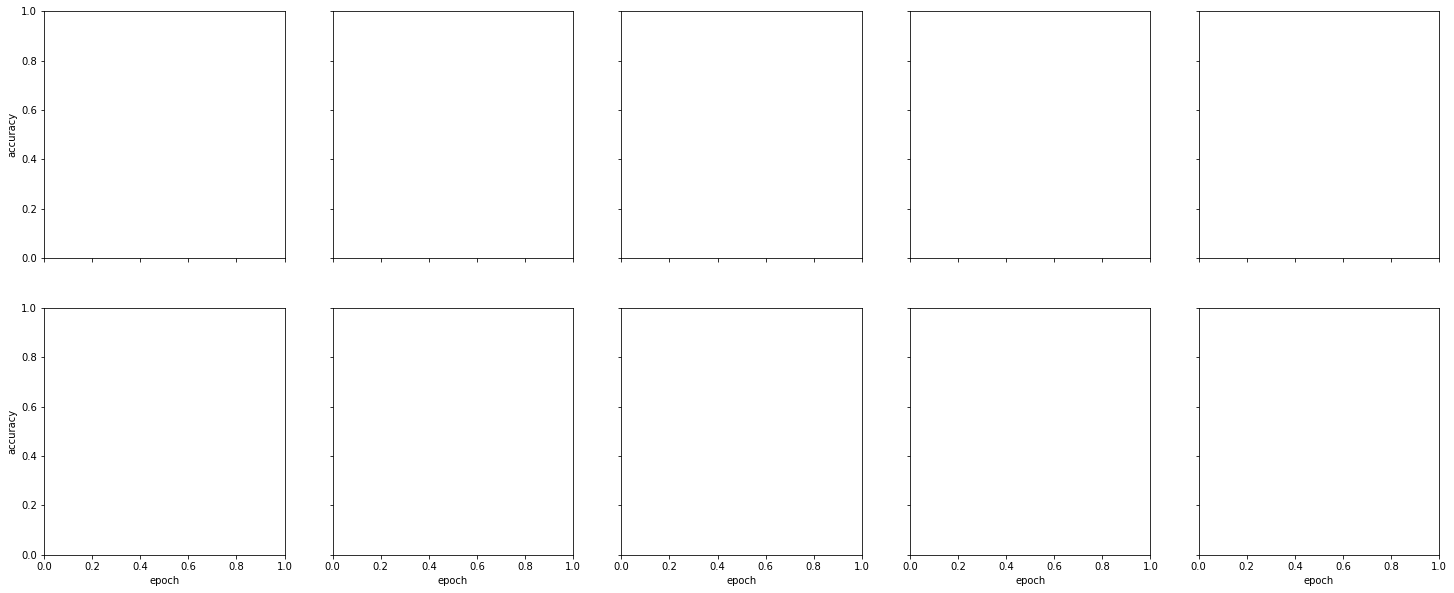

In [28]:
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

for i in range(len(acc_train_his)):
    axs[0 + i // 5, i % 5].plot(loss_train_his[i])
    axs[0 + i // 5, i % 5].plot(loss_val_his[i])
    axs[0 + i // 5, i % 5].set_title(f'model loss fold{i + 1}')
    axs[0 + i // 5, i % 5].legend([f'train{i}', f'val{i}'], loc='upper left')
    
for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='accuracy')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [29]:
import pandas as pd
import numpy as np
from numpy import savetxt
from scipy.io.arff import loadarff 
from sklearn import preprocessing
import torch
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.feature_selection import chi2, RFE

# models
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, balanced_accuracy_score, average_precision_score, \
    mean_squared_error, r2_score, brier_score_loss
from sklearn.utils import resample
from scipy.stats import pearsonr
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import json
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers

import random
import string
import datetime

from typing import Tuple

import logging
import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras import optimizers

from tensorflow import keras
from sklearn.ensemble import HistGradientBoostingClassifier

In [30]:
from scipy.special import y1
import os
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
fold_no = 1
acc_per_fold = []
pre_per_fold = []
recall_per_fold = []
f1_per_fold = []      
for train, test in skf.split(X, y):
    
    # CLASSIFICATION
    # Random Forest
    model = RandomForestClassifier( criterion='gini', min_samples_split=2,min_samples_leaf=1,  min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None,  random_state=0, verbose=0, warm_start=False, class_weight='balanced'  )
    # Decision Tree
    
 #   model = DecisionTreeClassifier(criterion="entropy",min_samples_split=2, min_samples_leaf=1,random_state=0, class_weight='balanced')
    
    # Logistic Regression
 #   model = LogisticRegression(random_state=0, class_weight='balanced')
        
    # SVM
  #  model = SVC(random_state=0, class_weight='balanced', kernel='linear')
    
    # Extra trees
   # model = ExtraTreesClassifier(random_state=0, class_weight='balanced', criterion='gini')
        
    # Adaboost
 #   model = AdaBoostClassifier(random_state=0, n_estimators=600)
 
    # XGBoost
 #   model = xgb.XGBClassifier(random_state=0)
      #MLP
#    model = MLPClassifier(random_state=0)

   # model = HistGradientBoostingClassifier(random_state=0)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model.fit(X[train], y[train])
    pred_y = model.predict(X[test])
    report = classification_report(y[test], pred_y, output_dict=True)
    """
    disp = plot_confusion_matrix(model, X[test], y[test],
                                display_labels=[0, 1],
                                cmap=plt.cm.Blues)
                                """
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    score = report['accuracy']
    f1 = report['macro avg']['f1-score']
    weighted_precision = report['weighted avg']['precision']
    weighted_recall = report['weighted avg']['recall']
    weighted_f1 = report['weighted avg']['f1-score']
    auc = roc_auc_score(y[test], model.predict_proba(X[test])[:, 1])
    """
    tp = disp.confusion_matrix[1][1]
    fp = disp.confusion_matrix[0][1]
    fn = disp.confusion_matrix[1][0]
    tn = disp.confusion_matrix[0][0]
    """
    
#     results['kc2'][i+1]["vanilla_gan"]['randomforest'] = [score, precision, recall, f1, auc, tp, fp, tn, fn, weighted_precision, weighted_recall, weighted_f1]
    
    scores = model.score(X[test], y[test])
    print(f'Score for fold {fold_no}: {scores}')
    acc_per_fold.append(scores)
    pre_per_fold.append(precision)
    recall_per_fold.append(recall)
    f1_per_fold.append(f1)
    fold_no = fold_no + 1
    #auc = auc+1

------------------------------------------------------------------------
Training for fold 1 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 1: 0.9746543778801844
------------------------------------------------------------------------
Training for fold 2 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 2: 0.967741935483871
------------------------------------------------------------------------
Training for fold 3 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 3: 0.9792147806004619
------------------------------------------------------------------------
Training for fold 4 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 4: 0.9676674364896074
------------------------------------------------------------------------
Training for fold 5 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 5: 0.9491916859122402
------------------------------------------------------------------------
Training for fold 6 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 6: 0.9584295612009238
------------------------------------------------------------------------
Training for fold 7 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 7: 0.9491916859122402
------------------------------------------------------------------------
Training for fold 8 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 8: 0.9676674364896074
------------------------------------------------------------------------
Training for fold 9 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 9: 0.9653579676674365
------------------------------------------------------------------------
Training for fold 10 ...


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Score for fold 10: 0.9722863741339491


In [31]:
print(f'Mean Acc: {np.mean(np.array(acc_per_fold))}')
print(f'Mean Acc: {np.mean(np.array(pre_per_fold))}')
print(f'Mean Acc: {np.mean(np.array(recall_per_fold))}')
print(f'Mean Acc: {np.mean(np.array(f1_per_fold))}')
#print(f'Mean Acc: {np.mean(np.array(auc))}')

Mean Acc: 0.9651403241770522
Mean Acc: 0.9640120864662801
Mean Acc: 0.967975942805128
Mean Acc: 0.9649629903281214
